In [1]:
# Chargement des librairie

import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
#chargement de la première feuille de données
X = pd.read_excel("autos_acp_pour_python.xlsx",
                  sheet_name=0,header=0,index_col=0)

#dimension
X.shape

(18, 6)

In [3]:
# Affichage des cinq première observations
X.head()

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165


In [4]:
#nombre d'observations
n = X.shape[0]
n

18

In [5]:
#nombre de variables
p = X.shape[1]

In [6]:
p

6

In [8]:
X

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


In [7]:
# Centrage et réduction des variables
#instanciation
sc = StandardScaler()

#transformation
Z = sc.fit_transform(X)
Z

array([[-0.77509889, -0.28335818, -1.88508077, -1.09734528, -1.56900676,
         0.56976043],
       [-0.12016326,  0.01963869,  1.60580955,  2.0010414 ,  0.23416142,
         0.14597168],
       [-0.92920139, -0.83885242, -0.44217944,  0.25819889, -0.21663062,
        -0.53209032],
       [-1.12733318, -1.29334771, -1.00072189, -1.09734528, -1.11821472,
        -0.61684807],
       [-0.12841875,  0.67613189,  0.25599862, -0.51639778,  0.19659542,
         0.56976043],
       [-0.9209459 , -0.13185975, -0.20945342,  0.45184806,  0.0087654 ,
         0.14597168],
       [ 0.45221746, -0.28335818,  0.72145067,  0.45184806,  0.60982146,
        -0.36257482],
       [-0.18345536, -1.49534562, -0.44217944, -0.71004695, -0.51715865,
        -1.54918332],
       [ 2.84080623,  2.19111619,  0.86108628,  1.22644473,  1.81193359,
         1.84112668],
       [-1.28143568, -1.49534562, -1.60580955, -1.87194195, -1.98223281,
        -1.54918332],
       [-0.16969621,  1.23162613, -0.25599862, -0.

In [10]:
# moyenne
np.mean(Z,axis=0)

array([-2.22044605e-16, -1.41861831e-16,  0.00000000e+00,  1.86270752e-15,
        5.73615229e-16,  5.55111512e-16])

In [11]:
#ecart-type des données centrées et réduies
np.std(Z,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1.])

In [12]:
# Application de l'ACP sur nos données

#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
acp

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [13]:
#calculs
coord = acp.fit_transform(Z)

In [14]:
#nombre de composantes calculées
acp.n_components_

6

In [15]:
#variance expliquée
acp.explained_variance_

array([4.68090853, 0.90641889, 0.39501114, 0.22650574, 0.09826011,
       0.04583676])

In [16]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
eigval

array([4.42085806, 0.85606229, 0.37306608, 0.21392209, 0.09280121,
       0.04329027])

In [17]:
#ou bien en passant par les valeurs singulières
acp.singular_values_**2/n

array([4.42085806, 0.85606229, 0.37306608, 0.21392209, 0.09280121,
       0.04329027])

In [18]:
#proportion de variance expliquée
acp.explained_variance_ratio_

array([0.73680968, 0.14267705, 0.06217768, 0.03565368, 0.01546687,
       0.00721505])

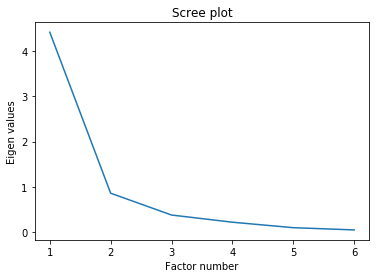

In [20]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

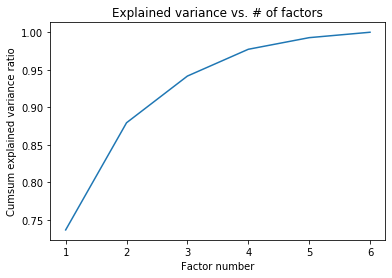

In [21]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [22]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [23]:
#test des bâtons brisés
pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})

,Val.Propre,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


In [24]:
#coordonnées factorielles des individus
cf = pd.DataFrame(coord,index=X.index,columns=np.arange(1,p+1))
cf

,1,2,3,4,5,6
Modele,,,,,,
Alfasud TI,-2.138924,1.785681,0.571862,0.201927,-0.301357,0.053921
Audi 100,1.561459,-1.527040,1.315271,-0.211352,0.148516,-0.327238
Simca 1300,-1.119385,-0.674505,0.456588,-0.167626,-0.375364,0.271803
Citroen GS Club,-2.573742,0.112884,0.148570,-0.017343,0.226853,0.263476
Fiat 132,0.427855,0.695567,-0.193286,-0.627754,0.263505,-0.037153
Lancia Beta,-0.304238,-0.196149,0.675803,-0.555941,-0.445086,0.200083
Peugeot 504,0.683928,-0.933057,-0.256823,0.203134,0.208652,0.153892
Renault 16 TL,-1.948493,-0.980448,-0.619575,0.630319,0.293165,0.108642
Renault 30,4.409735,1.063633,-0.593528,0.847248,-0.374890,0.043997


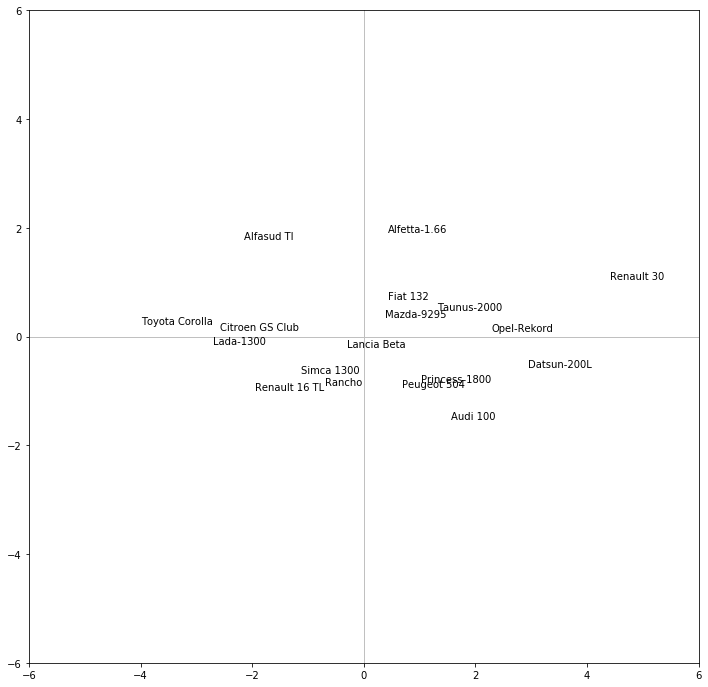

In [26]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [28]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
pd.DataFrame({'ID':X.index,'d_i':di})

,ID,d_i
0,Alfasud TI,8.225176
1,Audi 100,6.673755
2,Simca 1300,2.159327
3,Citroen GS Club,6.780145
4,Fiat 132,1.169124
5,Lancia Beta,1.134950
6,Peugeot 504,1.512793
7,Renault 16 TL,5.636826
8,Renault 30,21.789657
9,Toyota Corolla,16.290143


In [29]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di

pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,id,COS2_1,COS2_2
0,Alfasud TI,0.556218,0.387670
1,Audi 100,0.365334,0.349406
2,Simca 1300,0.580284,0.210694
3,Citroen GS Club,0.976992,0.001879
4,Fiat 132,0.156579,0.413826
5,Lancia Beta,0.081555,0.033900
6,Peugeot 504,0.309202,0.575488
7,Renault 16 TL,0.673539,0.170535
8,Renault 30,0.892431,0.051920
9,Toyota Corolla,0.975219,0.003426


In [30]:
#vérifions la théorie - somme en ligne des cos2 = 1
np.sum(cos2,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [31]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,id,CTR_1,CTR_2
0,Alfasud TI,0.057493,0.206933
1,Audi 100,0.030640,0.151329
2,Simca 1300,0.015746,0.029525
3,Citroen GS Club,0.083244,0.000827
4,Fiat 132,0.002300,0.031398
5,Lancia Beta,0.001163,0.002497
6,Peugeot 504,0.005878,0.056499
7,Renault 16 TL,0.047711,0.062384
8,Renault 30,0.244369,0.073419
9,Toyota Corolla,0.199640,0.003622


In [32]:
#vérifions la théorie
np.sum(ctr,axis=0)

array([1., 1., 1., 1., 1., 1.])

In [33]:
#le champ components_ de l'objet ACP
acp.components_

array([[ 0.42493602,  0.42179441,  0.42145993,  0.38692224,  0.43051198,
         0.35894427],
       [ 0.12419108,  0.41577389, -0.41181773, -0.446087  , -0.24267581,
         0.6198626 ],
       [-0.35361252, -0.18492049,  0.06763394,  0.60486812, -0.48439601,
         0.48547226],
       [ 0.80778648, -0.35779199, -0.27975231,  0.21156941, -0.30171136,
        -0.0735743 ],
       [ 0.15158003, -0.29373465,  0.73056903, -0.47819008, -0.30455842,
         0.18865511],
       [-0.05889517, -0.63303302, -0.19029153, -0.10956624,  0.5808122 ,
         0.45852167]])

In [34]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs    
corvar

array([[ 0.89346354,  0.1149061 , -0.21598347,  0.37361508,  0.04617627,
        -0.01225391],
       [ 0.88685803,  0.38468911, -0.11294784, -0.16548492, -0.08948124,
        -0.13171084],
       [ 0.88615477, -0.38102873,  0.04131023, -0.12939024,  0.22255537,
        -0.03959265],
       [ 0.81353638, -0.4127359 ,  0.36944822,  0.09785447, -0.14567244,
        -0.0227967 ],
       [ 0.90518746, -0.22453248, -0.29586489, -0.13954667, -0.09277852,
         0.12084561],
       [ 0.75471037,  0.57351941,  0.29652226, -0.03402937,  0.05747056,
         0.09540146]])

In [35]:
#on affiche pour les deux premiers axes
pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,id,COR_1,COR_2
0,CYL,0.893464,0.114906
1,PUISS,0.886858,0.384689
2,LONG,0.886155,-0.381029
3,LARG,0.813536,-0.412736
4,POIDS,0.905187,-0.224532
5,V_MAX,0.754710,0.573519


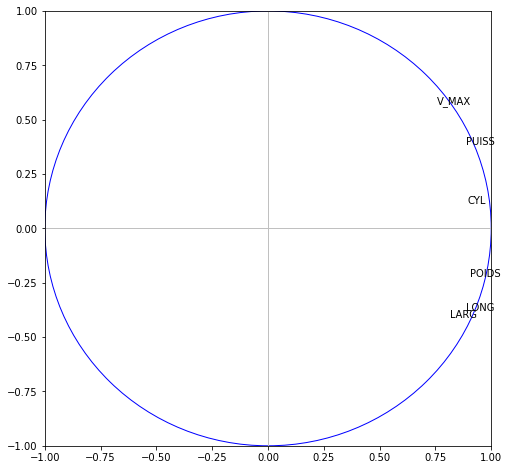

In [36]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [37]:
#cosinus carré des variables
cos2var = corvar**2
pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

,id,COS2_1,COS2_2
0,CYL,0.798277,0.013203
1,PUISS,0.786517,0.147986
2,LONG,0.785270,0.145183
3,LARG,0.661841,0.170351
4,POIDS,0.819364,0.050415
5,V_MAX,0.569588,0.328925


In [38]:
#vérification de la théorie
np.sum(cos2var,axis=1)

array([1., 1., 1., 1., 1., 1.])

In [39]:
#contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

,id,CTR_1,CTR_2
0,CYL,0.180571,0.015423
1,PUISS,0.177911,0.172868
2,LONG,0.177628,0.169594
3,LARG,0.149709,0.198994
4,POIDS,0.185341,0.058892
5,V_MAX,0.128841,0.384230


In [40]:
#ici, on peut vérifier
np.sum(ctrvar,axis=0)

array([1., 1., 1., 1., 1., 1.])

In [41]:
#chargement des individus supplémentaires
indSupp = pd.read_excel("autos_acp_pour_python.xlsx",
                        sheet_name=1,header=0,index_col=0)
indSupp

,CYL,PUISS,LONG,LARG,POIDS,V_MAX
Modele,,,,,,
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


In [42]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
ZIndSupp

array([[ 2.84080623,  2.59511201,  1.79199036,  2.0010414 ,  2.48812166,
         1.84112668],
       [-0.94571238, -0.53585556, -0.90763148, -1.87194195, -1.23091273,
         0.14597168]])

In [43]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
coordSupp

array([[ 5.56329226,  0.33860928, -0.46428878,  0.40214608, -0.38981076,
        -0.08102064],
       [-2.21224139,  1.25777905, -0.09304388, -0.35370189,  0.648528  ,
         0.12473042]])

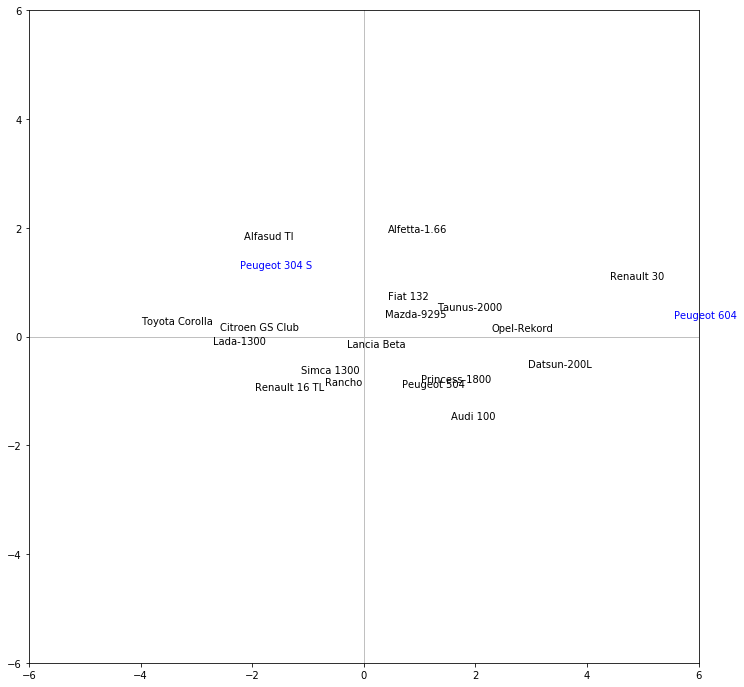

In [44]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [45]:
#importation des variables supplémentaires
varSupp = pd.read_excel("autos_acp_pour_python.xlsx",
                        sheet_name=2,header=0,index_col=0)
varSupp

,PRIX,R_POIDS_PUIS,FINITION
Modele,,,
Alfasud TI,30570,11.012658,2_B
Audi 100,39990,13.058824,3_TB
Simca 1300,29600,15.441176,1_M
Citroen GS Club,28250,15.762712,1_M
Fiat 132,34900,11.275510,2_B
Lancia Beta,35480,13.170732,3_TB
Peugeot 504,32300,14.683544,2_B
Renault 16 TL,32000,18.363636,2_B
Renault 30,47700,10.312500,3_TB


In [46]:
#variables supplémentaires quanti
vsQuanti = varSupp.iloc[:,:2].values
vsQuanti

array([[3.05700000e+04, 1.10126582e+01],
       [3.99900000e+04, 1.30588235e+01],
       [2.96000000e+04, 1.54411765e+01],
       [2.82500000e+04, 1.57627119e+01],
       [3.49000000e+04, 1.12755102e+01],
       [3.54800000e+04, 1.31707317e+01],
       [3.23000000e+04, 1.46835443e+01],
       [3.20000000e+04, 1.83636364e+01],
       [4.77000000e+04, 1.03125000e+01],
       [2.65400000e+04, 1.48181818e+01],
       [4.23950000e+04, 9.72477064e+00],
       [3.39900000e+04, 1.41463415e+01],
       [4.39800000e+04, 1.19130435e+01],
       [3.50100000e+04, 1.10204082e+01],
       [3.94500000e+04, 1.41125000e+01],
       [2.79000000e+04, 1.31927711e+01],
       [3.27000000e+04, 1.12000000e+01],
       [2.21000000e+04, 1.40441176e+01]])

In [47]:
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
        
#affichage des corrélations avec les axes
corSupp

array([[ 0.77247524,  0.08670844, -0.13389277, -0.22582891, -0.15944978,
        -0.10254878],
       [-0.58903888, -0.67254512, -0.15017616,  0.21365718,  0.10162791,
         0.28999742]])

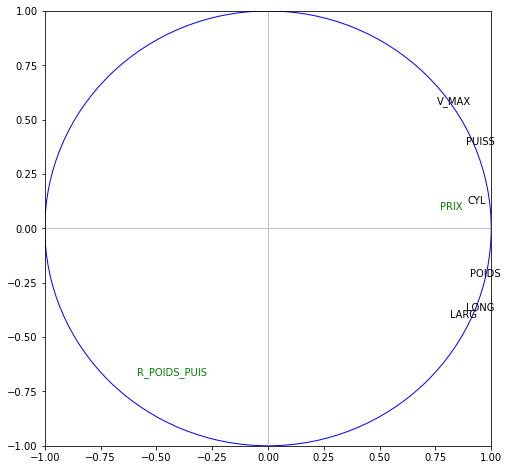

In [48]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
for j in range(vsQuanti.shape[1]):
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [49]:
#traitement de var. quali supplementaire
vsQuali = varSupp.iloc[:,2]
vsQuali

Modele
Alfasud TI          2_B
Audi 100           3_TB
Simca 1300          1_M
Citroen GS Club     1_M
Fiat 132            2_B
Lancia Beta        3_TB
Peugeot 504         2_B
Renault 16 TL       2_B
Renault 30         3_TB
Toyota Corolla      1_M
Alfetta-1.66       3_TB
Princess-1800       2_B
Datsun-200L        3_TB
Taunus-2000         2_B
Rancho             3_TB
Mazda-9295          1_M
Opel-Rekord         2_B
Lada-1300           1_M
Name: FINITION, dtype: object

In [50]:
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
modalites

array(['1_M', '2_B', '3_TB'], dtype=object)

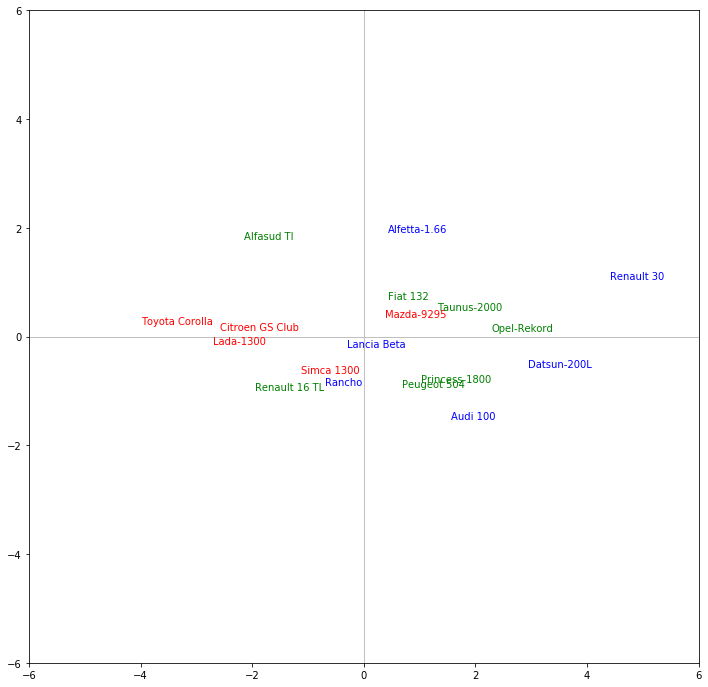

In [51]:
#liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [52]:
#structure intermédiaire
df = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})

#puis calculer les moyennes conditionnelles
df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean)

,F1,F2
Finition,,
1_M,-2.000355,-0.022579
2_B,0.235313,0.045271
3_TB,1.392430,-0.034001
